In [1]:
import re
import math
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score , recall_score , confusion_matrix , f1_score
from sklearn.model_selection import GridSearchCV
from ast import literal_eval
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
from sklearn import datasets, metrics, model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
#data_train = pd.read_csv('./data/twitter_data_before_analysis.csv', error_bad_lines=False)
data_train = pd.read_csv('./data/twitter_data_before_analysis1.csv', error_bad_lines=False)
data_train = data_train.append(pd.read_csv('./data/ko_news_data_before_analysis.csv', error_bad_lines=False))
data_train = data_train.append(pd.read_csv('./data/en_news_data_before_analysis.csv', error_bad_lines=False))

In [3]:
data_train['period'] = pd.to_numeric(data_train['period'], errors='coerce')
data_train['category'] = pd.to_numeric(data_train['category'], errors='coerce')
data_train['label'] = pd.to_numeric(data_train['label'], errors='coerce')
data_train['Silhouette'] = pd.to_numeric(data_train['Silhouette'], errors='coerce')

In [4]:
print(len(data_train))

187533


In [5]:
X_train = data_train[data_train.columns.difference(['result'])]

In [6]:
#x_data_df = data_train[['period','raw_data','closer#','category','label','Silhouette']]
y_train = data_train['result']

In [7]:
X_train = X_train.drop('Unnamed: 0', axis=1)

In [8]:
btc_data = pd.read_csv('../../analysis/cluster/causeanalysis/BTC/after_BTC_total.csv', error_bad_lines=False)
bch_data = pd.read_csv('../../analysis/cluster/causeanalysis/BCH/after_BCH_total.csv', error_bad_lines=False)
eth_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/after_ETH_total.csv', error_bad_lines=False)

In [9]:
data_test = pd.concat([btc_data,bch_data,eth_data],ignore_index=True)

In [10]:
data_test['period'] = pd.to_numeric(data_test['period'], errors='coerce')
data_test['category'] = pd.to_numeric(data_test['category'], errors='coerce')
data_test['label'] = pd.to_numeric(data_test['label'], errors='coerce')
data_test['Silhouette'] = pd.to_numeric(data_test['Silhouette'], errors='coerce')

In [11]:
def trans_result(x) :
    if x==0 :
        return 1
    if x==1 :
        return 2

In [12]:
data_test['result']=data_test['result'].apply(trans_result)

In [15]:
data_test[data_test['result']==2]

,Unnamed: 0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C97,C98,C99,C100,period,closer#,category,label,Silhouette,result
0,0,0.055791,0.067201,0.036511,0.037279,-0.108456,-0.012382,0.115639,-0.036428,0.052298,...,0.011846,-0.066626,0.002210,-0.026107,201712,2,3,4.0,0.697050,2
1,1,0.055324,0.069414,0.050060,0.054551,-0.121273,-0.020285,0.135186,-0.043571,0.049571,...,0.004311,-0.054605,0.006341,-0.012206,201712,2,3,4.0,0.697050,2
2,2,0.450239,0.531251,0.211260,0.536789,-0.981408,-0.085303,1.162932,-0.695507,0.750968,...,0.147823,-0.689736,0.231391,-0.344753,201712,2,3,13.0,0.697050,2
3,3,0.065031,0.077390,0.049108,0.055234,-0.130415,-0.005585,0.145353,-0.043958,0.061916,...,0.018522,-0.070093,0.015097,-0.032401,201712,2,3,4.0,0.697050,2
4,4,0.114619,0.127246,0.063834,0.108179,-0.238480,-0.026743,0.265977,-0.139591,0.164805,...,0.028487,-0.151610,0.045337,-0.066052,201712,2,3,2.0,0.697050,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58929,13404,0.000337,-0.005514,-0.001608,0.003084,-0.004457,-0.005445,0.000816,0.005935,0.002326,...,0.001354,-0.006086,-0.007855,-0.006233,201822,2,3,11.0,0.676748,2
58930,13405,-0.004633,0.000762,0.005845,0.002824,-0.004052,-0.004680,0.004581,0.003624,-0.003662,...,0.004297,-0.004271,-0.005320,-0.003989,201822,2,3,11.0,0.676748,2
58931,13406,-0.000073,-0.006311,-0.000139,0.011474,-0.002909,-0.006782,-0.002925,0.002916,-0.000318,...,0.012653,-0.010827,-0.006800,-0.004173,201822,2,3,11.0,0.676748,2
58932,13407,-0.005114,-0.000916,0.000058,0.013950,0.000576,-0.008504,-0.002621,0.004988,-0.000049,...,0.015826,-0.005062,-0.010860,-0.000379,201822,2,3,11.0,0.676748,2


In [16]:
y_test = data_test['result']

In [17]:
X_test = data_test[data_test.columns.difference(['result'])]

In [18]:
X_test = X_test.drop('Unnamed: 0', axis=1)

In [19]:
X_test

,C1,C10,C100,C11,C12,C13,C14,C15,C16,C17,...,C95,C96,C97,C98,C99,Silhouette,category,closer#,label,period
0,0.055791,0.068782,-0.026107,-0.066030,0.031446,-0.051075,-0.001214,0.013288,-0.074120,-0.043237,...,-0.154494,-0.006258,0.011846,-0.066626,0.002210,0.697050,3,2,4.0,201712
1,0.055324,0.062319,-0.012206,-0.069865,0.027048,-0.049585,-0.009296,0.030463,-0.079925,-0.043982,...,-0.167317,-0.012893,0.004311,-0.054605,0.006341,0.697050,3,2,4.0,201712
2,0.450239,0.693979,-0.344753,-0.611851,0.340052,-0.439572,0.016754,0.193928,-0.866130,-0.107834,...,-1.529588,0.140587,0.147823,-0.689736,0.231391,0.697050,3,2,13.0,201712
3,0.065031,0.080975,-0.032401,-0.082266,0.045189,-0.053763,0.000752,0.014797,-0.091770,-0.050328,...,-0.175071,-0.011462,0.018522,-0.070093,0.015097,0.697050,3,2,4.0,201712
4,0.114619,0.149556,-0.066052,-0.147802,0.078769,-0.101842,0.000272,0.051071,-0.194238,-0.048906,...,-0.351923,0.008798,0.028487,-0.151610,0.045337,0.697050,3,2,2.0,201712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62592,0.007526,0.000226,0.002922,0.002423,-0.011788,-0.003523,0.008707,-0.014678,-0.006766,-0.003803,...,-0.001407,-0.002353,0.000688,-0.001124,0.003302,0.690571,3,2,6.0,201821
62593,0.001567,-0.000234,-0.001776,-0.000090,-0.000380,-0.007325,0.007395,-0.007073,-0.000563,-0.003848,...,-0.001786,-0.002352,0.003189,0.004044,-0.003393,0.690571,3,2,6.0,201821
62594,0.004602,-0.000838,0.000404,0.004663,-0.005408,-0.001684,0.000722,-0.004215,-0.002476,0.002638,...,0.004331,0.004369,0.004850,0.005045,0.000538,0.690571,3,2,6.0,201821
62595,0.003545,0.003096,-0.002754,0.004138,-0.005611,-0.008500,0.007488,-0.003219,-0.003871,-0.006312,...,-0.002103,-0.004665,0.003331,0.003858,-0.000033,0.690571,3,2,6.0,201821


In [20]:
rf_clf = RandomForestClassifier(random_state = 11 ,n_jobs=-1) # random forest

In [21]:
rf_clf.fit(X_train, y_train)

y_score = rf_clf.predict_proba(X_test)



In [22]:
rf_pred = rf_clf.predict(X_test)  # random forest predict

In [23]:
print('Random Forest Accuracy :  ',accuracy_score(y_test,rf_pred))
print('Random Forest Precision :  ',precision_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest Recall :  ',recall_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest f1 :  ',f1_score(y_test,rf_pred,pos_label='positive',average='weighted'))

Random Forest Accuracy :   0.47737112002172627
Random Forest Precision :   0.4722482760717115
Random Forest Recall :   0.47737112002172627
Random Forest f1 :   0.4641079154497784


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
y_score

array([[0.41, 0.34, 0.25],
       [0.42, 0.36, 0.22],
       [0.41, 0.3 , 0.29],
       ...,
       [0.43, 0.32, 0.25],
       [0.41, 0.36, 0.23],
       [0.47, 0.35, 0.18]])

In [25]:
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[1, 2, 3])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])



0        2
1        2
2        2
3        2
4        2
        ..
62592    1
62593    1
62594    1
62595    1
62596    1
Name: result, Length: 62597, dtype: int64
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
class :  0 == 0.6575325130259766
class :  1 == 0.4574882725582241
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [26]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

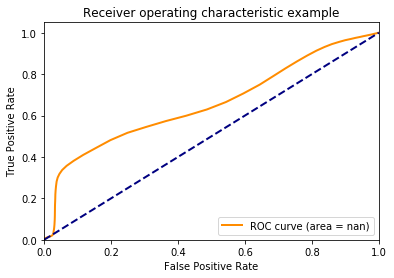

In [27]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

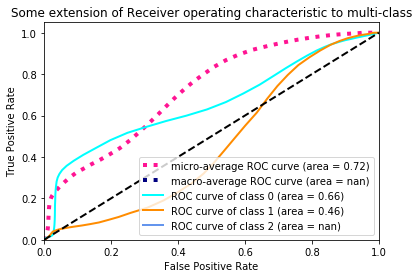

In [28]:
from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [29]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)

In [30]:
print('Decision Tree Accuracy :  ',accuracy_score(y_test,dt_pred))
print('Decision Tree Precision :  ',precision_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree Recall :  ',recall_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree f1 :  ',f1_score(y_test,dt_pred,pos_label='positive',average='weighted'))

Decision Tree Accuracy :   0.657140118536032
Decision Tree Precision :   0.7323505278593855
Decision Tree Recall :   0.657140118536032
Decision Tree f1 :   0.6034500464954698


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
y_score = dt_clf.predict_proba(X_test)

In [32]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [33]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.6213577186983312
class :  1 == 0.6120466295387075
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [34]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

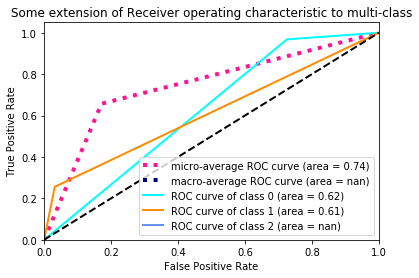

In [35]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [36]:
#gb_clf = GradientBoostingClassifier(random_state = 11) # random forest
lgbm_clf =  LGBMClassifier(random_state = 11)

In [37]:
#gb_clf.fit(X_train,y_train)
#gb_pred = gb_clf.predict(X_test)

lgbm_clf.fit(X_train,y_train)
lgbm_pred = lgbm_clf.predict(X_test)

In [38]:
#print('Gredient Boosting Accuracy :  ',accuracy_score(y_test,gb_pred))
#print('Gredient Boosting Precision :  ',precision_score(y_test,gb_pred,pos_label='positive',average='weighted'))
#print('Gredient Boosting Recall :  ',recall_score(y_test,gb_pred,pos_label='positive',average='weighted'))
#print('Gredient Boosting f1 :  ',f1_score(y_test,gb_pred,pos_label='positive',average='weighted'))
print('Light GBM Accuracy :  ',accuracy_score(y_test,lgbm_pred))
print('Light GBM Precision :  ',precision_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))
print('Light GBM Recall :  ',recall_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))
print('Light GBM f1 :  ',f1_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))

Light GBM Accuracy :   0.45082032685272455
Light GBM Precision :   0.473673107373544
Light GBM Recall :   0.45082032685272455
Light GBM f1 :   0.4619121567743803


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
y_score = lgbm_clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

In [40]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.43914933911814114
class :  1 == 0.41681864241173405
class :  2 == nan


In [41]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

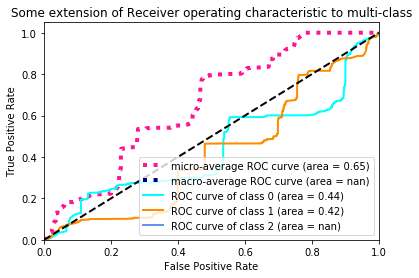

In [42]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [43]:
lr_clf = LogisticRegression(random_state = 11)

In [44]:
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)

In [45]:
print('Logistic Regression Accuracy :  ',accuracy_score(y_test,lr_pred))
print('Logistic Regression  Precision :  ',precision_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  Recall :  ',recall_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  f1 :  ',f1_score(y_test,lr_pred,pos_label='positive',average='weighted'))

Logistic Regression Accuracy :   0.43665031870536924
Logistic Regression  Precision :   0.19066350082550054
Logistic Regression  Recall :   0.43665031870536924
Logistic Regression  f1 :   0.26542784746300135


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
y_score = lr_clf.predict_proba(X_test)

y_score = np.round(y_score,5)

fpr = dict()
tpr = dict()
roc_auc = dict()

In [47]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.39823807339877487
class :  1 == 0.48989176623269653
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [48]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

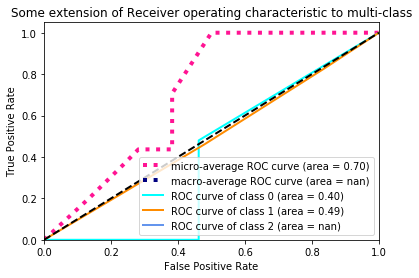

In [49]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [50]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [51]:
X_train

,C1,C10,C100,C11,C12,C13,C14,C15,C16,C17,...,C95,C96,C97,C98,C99,Silhouette,category,closer#,label,period
0,-0.001495,0.002059,-0.003641,0.002519,-0.000030,-0.000061,0.000266,-0.001268,-0.005870,0.004812,...,-0.001215,-0.005617,-0.000767,0.003659,-0.001297,0.126229,3.0,2,1.0,202011
1,-0.021860,0.025023,-0.030539,-0.053737,-0.034043,-0.106272,0.101318,0.046353,-0.032074,0.056494,...,-0.085919,-0.086635,-0.032728,0.003305,0.029844,0.126229,3.0,2,12.0,202011
2,-0.006153,0.000252,-0.000431,-0.007744,-0.001371,-0.012007,0.004584,-0.001146,-0.006225,0.003439,...,-0.002505,-0.002000,-0.006141,-0.000919,0.005992,0.126229,3.0,2,13.0,202011
3,-0.011715,0.010112,-0.014666,-0.018584,-0.010574,-0.035928,0.037478,0.020299,-0.011364,0.024920,...,-0.035902,-0.030800,-0.010657,0.002631,0.007532,0.126229,3.0,2,12.0,202011
4,-0.004312,0.010082,-0.009291,-0.017374,-0.011016,-0.033451,0.031159,0.015416,-0.016344,0.022197,...,-0.027211,-0.024827,-0.013575,-0.000735,0.013313,0.126229,3.0,2,12.0,202011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112261,0.002639,-0.007745,0.015926,-0.011952,-0.002111,-0.004357,-0.000599,-0.012847,-0.000155,-0.024394,...,0.005706,0.015451,0.006023,0.001769,0.004318,0.746625,1.0,2,5.0,201924
112262,-0.000535,-0.008106,0.016009,-0.012102,0.005943,-0.004983,-0.004764,-0.011634,0.001370,-0.025071,...,0.004042,0.014530,-0.000182,0.002224,-0.003322,0.746625,1.0,2,5.0,201924
112263,0.004187,0.000229,0.007715,-0.005602,0.004873,-0.005352,-0.002468,-0.003581,0.005097,-0.003656,...,-0.003402,0.004426,-0.001443,0.001934,-0.000474,0.746625,1.0,2,5.0,201924
112264,-0.002951,-0.006462,0.012489,-0.003590,-0.002220,-0.002896,-0.001683,-0.016026,0.004791,-0.019189,...,0.003951,0.013484,0.002950,0.001749,0.001292,0.746625,1.0,2,5.0,201924


In [52]:
model = Sequential()
model.add(Dense(120, input_dim=105, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [53]:
# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
from keras.utils import to_categorical

y_train = y_train.apply(lambda x : x-1)

In [55]:
y_cate_train = to_categorical(y_train , num_classes=3)
#y_cate_train = y_train

In [56]:
y_cate_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [57]:
#y_cate_train = list(y_train)

In [58]:
#X_train

In [59]:
model.fit(X_train,y_cate_train, epochs=30, batch_size=500)

Epoch 1/30
187533/187533 [==============================] - 1s 7us/step - loss: 234.2979 - accuracy: 0.3946
Epoch 2/30
187533/187533 [==============================] - 1s 6us/step - loss: 45.3108 - accuracy: 0.3968
Epoch 3/30
187533/187533 [==============================] - 1s 6us/step - loss: 13.8440 - accuracy: 0.3974
Epoch 4/30
187533/187533 [==============================] - 1s 6us/step - loss: 15.8108 - accuracy: 0.3943
Epoch 5/30
187533/187533 [==============================] - 1s 6us/step - loss: 6.8643 - accuracy: 0.3977
Epoch 6/30
187533/187533 [==============================] - 1s 6us/step - loss: 4.7913 - accuracy: 0.3977
Epoch 7/30
187533/187533 [==============================] - 1s 6us/step - loss: 2.7712 - accuracy: 0.3998
Epoch 8/30
187533/187533 [==============================] - 1s 6us/step - loss: 2.0811 - accuracy: 0.4027
Epoch 9/30
187533/187533 [==============================] - 1s 6us/step - loss: 2.2841 - accuracy: 0.4034
Epoch 10/30
187533/187533 [==============

In [60]:
X_test

,C1,C10,C100,C11,C12,C13,C14,C15,C16,C17,...,C95,C96,C97,C98,C99,Silhouette,category,closer#,label,period
0,0.055791,0.068782,-0.026107,-0.066030,0.031446,-0.051075,-0.001214,0.013288,-0.074120,-0.043237,...,-0.154494,-0.006258,0.011846,-0.066626,0.002210,0.697050,3,2,4.0,201712
1,0.055324,0.062319,-0.012206,-0.069865,0.027048,-0.049585,-0.009296,0.030463,-0.079925,-0.043982,...,-0.167317,-0.012893,0.004311,-0.054605,0.006341,0.697050,3,2,4.0,201712
2,0.450239,0.693979,-0.344753,-0.611851,0.340052,-0.439572,0.016754,0.193928,-0.866130,-0.107834,...,-1.529588,0.140587,0.147823,-0.689736,0.231391,0.697050,3,2,13.0,201712
3,0.065031,0.080975,-0.032401,-0.082266,0.045189,-0.053763,0.000752,0.014797,-0.091770,-0.050328,...,-0.175071,-0.011462,0.018522,-0.070093,0.015097,0.697050,3,2,4.0,201712
4,0.114619,0.149556,-0.066052,-0.147802,0.078769,-0.101842,0.000272,0.051071,-0.194238,-0.048906,...,-0.351923,0.008798,0.028487,-0.151610,0.045337,0.697050,3,2,2.0,201712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62592,0.007526,0.000226,0.002922,0.002423,-0.011788,-0.003523,0.008707,-0.014678,-0.006766,-0.003803,...,-0.001407,-0.002353,0.000688,-0.001124,0.003302,0.690571,3,2,6.0,201821
62593,0.001567,-0.000234,-0.001776,-0.000090,-0.000380,-0.007325,0.007395,-0.007073,-0.000563,-0.003848,...,-0.001786,-0.002352,0.003189,0.004044,-0.003393,0.690571,3,2,6.0,201821
62594,0.004602,-0.000838,0.000404,0.004663,-0.005408,-0.001684,0.000722,-0.004215,-0.002476,0.002638,...,0.004331,0.004369,0.004850,0.005045,0.000538,0.690571,3,2,6.0,201821
62595,0.003545,0.003096,-0.002754,0.004138,-0.005611,-0.008500,0.007488,-0.003219,-0.003871,-0.006312,...,-0.002103,-0.004665,0.003331,0.003858,-0.000033,0.690571,3,2,6.0,201821


In [61]:
y_test = y_test.apply(lambda x : x-1)

In [62]:
y_cate_test = to_categorical(y_test , num_classes=3)

In [63]:
y_cate_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [64]:
score = model.evaluate(X_test, y_cate_test, batch_size=500)

62597/62597 [==============================] - 0s 3us/step


In [65]:
#score = model.evaluate(X_test, y_cate_test, batch_size=500)

In [66]:
score

[0.8473300686495325, 0.4366503059864044]

In [67]:
yhat_probs = model.predict(X_test ,batch_size=500 )

yhat_classes = model.predict_classes(X_test ,batch_size=500 )

# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

In [68]:
yhat_probs

array([[0.37624416, 0.5068919 , 0.11686399],
       [0.37624454, 0.5068905 , 0.11686499],
       [0.37624815, 0.50682575, 0.11692609],
       ...,
       [0.3762384 , 0.50698274, 0.11677885],
       [0.37623864, 0.5069831 , 0.11677827],
       [0.37623918, 0.5069819 , 0.11677889]], dtype=float32)

In [69]:
yhat_classes

array([1, 1, 1, ..., 1, 1, 1])

In [70]:
y_cate_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [71]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes )
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes , average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes , average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.436650
Precision: 0.436650
Recall: 0.436650
F1 score: 0.436650


In [72]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[0, 1, 2])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], yhat_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

0        1
1        1
2        1
3        1
4        1
        ..
62592    0
62593    0
62594    0
62595    0
62596    0
Name: result, Length: 62597, dtype: int64
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
class :  0 == 0.5186283414889483
class :  1 == 0.5389967723188227
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [73]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), yhat_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

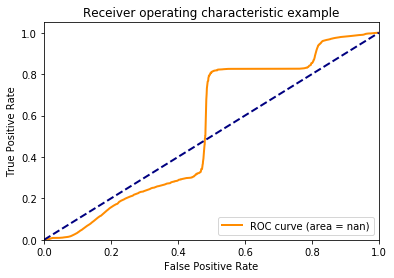

In [74]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


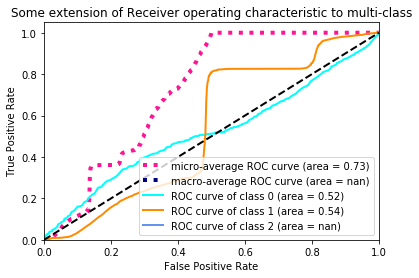

In [75]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [76]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes )
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes , average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes , average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.436650
Precision: 0.436650
Recall: 0.436650
F1 score: 0.436650


In [77]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[0, 1, 2])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], yhat_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

0        1
1        1
2        1
3        1
4        1
        ..
62592    0
62593    0
62594    0
62595    0
62596    0
Name: result, Length: 62597, dtype: int64
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
class :  0 == 0.5186283414889483
class :  1 == 0.5389967723188227
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [78]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), yhat_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

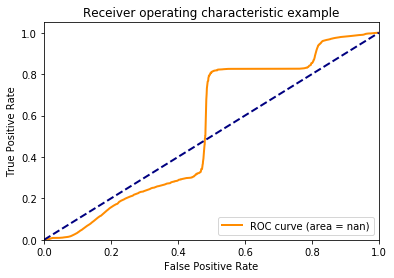

In [79]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


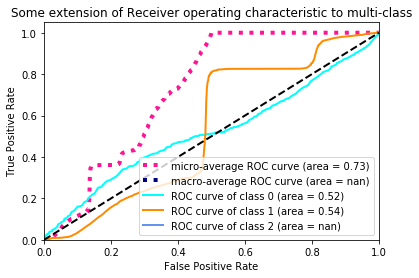

In [80]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()